##Task 1: Acquire, preprocess and analyze the data
(Nghi Huynh 260632588)





###Initialization:

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math
import re
from IPython.core.debugger import set_trace
np.random.seed(1234)



###Subtask1: Download the dataset 1 and 2:

In [ ]:
import pandas as pd
import tensorflow as tf

dataset1 =pd.read_csv('https://raw.githubusercontent.com/google-research/open-covid-19-data/master/data/exports/search_trends_symptoms_dataset/United%20States%20of%20America/2020_US_weekly_symptoms_dataset.csv')
dataset2 =pd.read_csv('https://raw.githubusercontent.com/google-research/open-covid-19-data/master/data/exports/cc_by/aggregated_cc_by.csv')



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


###Subtask2: Load the datasets into pandas dataframe:

In [ ]:
dataset1.head()

,open_covid_region_code,country_region_code,country_region,sub_region_1,sub_region_1_code,sub_region_2,sub_region_2_code,date,symptom:Abdominal obesity,symptom:Abdominal pain,symptom:Acne,symptom:Actinic keratosis,symptom:Acute bronchitis,symptom:Adrenal crisis,symptom:Ageusia,symptom:Alcoholism,symptom:Allergic conjunctivitis,symptom:Allergy,symptom:Amblyopia,symptom:Amenorrhea,symptom:Amnesia,symptom:Anal fissure,symptom:Anaphylaxis,symptom:Anemia,symptom:Angina pectoris,symptom:Angioedema,symptom:Angular cheilitis,symptom:Anosmia,symptom:Anxiety,symptom:Aphasia,symptom:Aphonia,symptom:Apnea,symptom:Arthralgia,symptom:Arthritis,symptom:Ascites,symptom:Asperger syndrome,symptom:Asphyxia,symptom:Asthma,symptom:Astigmatism,symptom:Ataxia,...,symptom:Throat irritation,symptom:Thrombocytopenia,symptom:Thyroid nodule,symptom:Tic,symptom:Tinnitus,symptom:Tonsillitis,symptom:Toothache,symptom:Tremor,symptom:Trichoptilosis,symptom:Tumor,symptom:Type 2 diabetes,symptom:Unconsciousness,symptom:Underweight,symptom:Upper respiratory tract infection,symptom:Urethritis,symptom:Urinary incontinence,symptom:Urinary tract infection,symptom:Urinary urgency,symptom:Uterine contraction,symptom:Vaginal bleeding,symptom:Vaginal discharge,symptom:Vaginitis,symptom:Varicose veins,symptom:Vasculitis,symptom:Ventricular fibrillation,symptom:Ventricular tachycardia,symptom:Vertigo,symptom:Viral pneumonia,symptom:Visual acuity,symptom:Vomiting,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
0,US-AK,US,United States,Alaska,US-AK,NaN,NaN,2020-01-06,NaN,NaN,NaN,NaN,NaN,12.69,NaN,NaN,NaN,NaN,NaN,12.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.31,NaN,NaN,NaN,...,NaN,NaN,15.86,NaN,NaN,NaN,NaN,NaN,11.90,NaN,NaN,NaN,NaN,18.84,13.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.08,9.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.28,NaN,NaN
1,US-AK,US,United States,Alaska,US-AK,NaN,NaN,2020-01-13,NaN,NaN,NaN,NaN,NaN,9.56,NaN,NaN,NaN,NaN,NaN,12.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.20,NaN,NaN,NaN,...,NaN,NaN,12.24,NaN,NaN,NaN,NaN,NaN,7.84,NaN,NaN,NaN,NaN,16.83,13.01,NaN,NaN,7.65,NaN,NaN,NaN,NaN,NaN,15.30,8.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.26,NaN,NaN
2,US-AK,US,United States,Alaska,US-AK,NaN,NaN,2020-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.90,NaN,NaN,NaN,...,NaN,NaN,17.66,NaN,NaN,NaN,NaN,NaN,15.27,NaN,NaN,NaN,NaN,18.40,12.14,NaN,NaN,7.54,NaN,NaN,NaN,NaN,NaN,10.30,16.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.48,NaN,NaN
3,US-AK,US,United States,Alaska,US-AK,NaN,NaN,2020-01-27,NaN,NaN,NaN,NaN,NaN,15.31,7.47,NaN,NaN,NaN,NaN,15.67,NaN,NaN,NaN,NaN,NaN,NaN,7.47,NaN,NaN,NaN,7.65,NaN,NaN,NaN,NaN,NaN,12.03,NaN,NaN,NaN,...,NaN,NaN,12.76,NaN,NaN,NaN,NaN,NaN,9.84,NaN,NaN,NaN,NaN,20.41,17.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.93,NaN,NaN
4,US-AK,US,United States,Alaska,US-AK,NaN,NaN,2020-02-03,NaN,NaN,NaN,NaN,NaN,8.81,NaN,NaN,NaN,NaN,NaN,13.87,NaN,NaN,NaN,NaN,NaN,NaN,8.06,NaN,NaN,NaN,12.56,NaN,NaN,NaN,NaN,NaN,14.24,NaN,NaN,NaN,...,NaN,NaN,16.68,NaN,NaN,NaN,NaN,NaN,10.68,NaN,NaN,NaN,NaN,20.62,16.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.24,10.68,NaN,NaN,10.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.93,NaN,NaN


In [ ]:
dataset2.head()

,open_covid_region_code,region_name,date,cases_cumulative,cases_new,cases_cumulative_per_million,cases_new_per_million,deaths_cumulative,deaths_new,deaths_cumulative_per_million,deaths_new_per_million,tests_new,tests_cumulative,tests_cumulative_per_thousand,tests_new_per_thousand,test_units,hospitalized_current,hospitalized_cumulative,hospitalized_new,discharged_new,discharged_cumulative,icu_current,icu_cumulative,ventilator_current,school_closing,school_closing_flag,workplace_closing,workplace_closing_flag,cancel_public_events_flag,restrictions_on_gatherings,restrictions_on_gatherings_flag,close_public_transit,close_public_transit_flag,stay_at_home_requirements,stay_at_home_requirements_flag,restrictions_on_internal_movement,restrictions_on_internal_movement_flag,international_travel_controls,income_support,income_support_flag,debt_contract_relief,fiscal_measures,international_support,public_information_campaigns,public_information_campaigns_flag,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,wildcard,confirmed_cases,confirmed_deaths,stringency_index,stringency_index_for_display,stringency_legacy_index,stringency_legacy_index_for_display,government_response_index,government_response_index_for_display,containment_health_index,containment_health_index_for_display,economic_support_index,economic_support_index_for_display
0,AFG,Afghanistan,2019-12-31,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,2020-01-01,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AFG,Afghanistan,2020-01-02,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AFG,Afghanistan,2020-01-03,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AFG,Afghanistan,2020-01-04,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dataset1.shape

(640, 430)

In [ ]:
dataset2.shape

(102912, 62)

###Subtask3: Clean the datasets:

In [ ]:
# a function takes in a dataset and drops columns with more than 70% of NaN, then return the dataset
def drop_columns(dataset):
  threshold=math.floor(dataset.shape[0]*0.65)
  for c in dataset.columns:
    if sum(dataset[c].isnull())>=threshold :
      dataset.drop(c,axis=1,inplace=True)
  return dataset


In [ ]:
# drop columns of missing values in dataset 1
raw_dataset1=drop_columns(dataset1).copy(deep=True)

In [ ]:
raw_dataset1

,open_covid_region_code,country_region_code,country_region,sub_region_1,sub_region_1_code,date,symptom:Adrenal crisis,symptom:Ageusia,symptom:Allergic conjunctivitis,symptom:Amenorrhea,symptom:Angular cheilitis,symptom:Anosmia,symptom:Aphonia,symptom:Asphyxia,symptom:Atheroma,symptom:Auditory hallucination,symptom:Balance disorder,symptom:Beau's lines,symptom:Burning Chest Pain,symptom:Cataplexy,symptom:Chorea,symptom:Cleft lip and cleft palate,symptom:Clouding of consciousness,symptom:Crackles,symptom:Crepitus,symptom:Cyanosis,symptom:Depersonalization,symptom:Dysautonomia,symptom:Dysgeusia,symptom:Dyspareunia,symptom:Epiphora,symptom:Esophagitis,symptom:Facial swelling,symptom:Fibrocystic breast changes,symptom:Focal seizure,symptom:Gastroparesis,symptom:Gingival recession,symptom:Globus pharyngis,symptom:Hemolysis,symptom:Hemoptysis,...,symptom:Hypersomnia,symptom:Hyperventilation,symptom:Hypochondriasis,symptom:Hypomania,symptom:Laryngitis,symptom:Male infertility,symptom:Mitral insufficiency,symptom:Muscle atrophy,symptom:Myoclonus,symptom:Nasal polyp,symptom:Neck mass,symptom:Neutropenia,symptom:Night terror,symptom:Nocturnal enuresis,symptom:Nystagmus,symptom:Onychorrhexis,symptom:Papule,symptom:Pericarditis,symptom:Petechia,symptom:Photophobia,symptom:Polydipsia,symptom:Polyuria,symptom:Ptosis,symptom:Pulmonary edema,symptom:Rectal pain,symptom:Rectal prolapse,symptom:Rheum,symptom:Rumination,symptom:Sensitivity to sound,symptom:Shallow breathing,symptom:Spasticity,symptom:Stomach rumble,symptom:Stridor,symptom:Subdural hematoma,symptom:Tachypnea,symptom:Tenderness,symptom:Trichoptilosis,symptom:Urinary urgency,symptom:Ventricular fibrillation,symptom:Viral pneumonia
0,US-AK,US,United States,Alaska,US-AK,2020-01-06,12.69,NaN,NaN,12.29,NaN,NaN,NaN,10.31,11.10,8.92,11.10,7.93,NaN,12.29,12.10,18.05,NaN,8.33,12.49,10.51,12.10,NaN,7.93,7.93,8.13,9.12,8.72,17.65,9.52,11.50,11.50,7.93,9.12,15.07,...,10.91,10.11,10.91,12.89,14.47,18.05,11.50,NaN,10.51,9.52,11.90,NaN,13.48,12.29,12.89,9.72,11.30,8.13,11.10,11.50,NaN,9.12,11.30,11.30,NaN,18.24,NaN,13.68,8.13,NaN,9.12,NaN,10.31,9.91,7.93,14.28,11.90,NaN,9.91,NaN
1,US-AK,US,United States,Alaska,US-AK,2020-01-13,9.56,NaN,NaN,12.62,NaN,NaN,NaN,13.20,13.20,8.61,10.90,11.86,NaN,14.92,11.47,34.81,9.95,8.22,NaN,11.86,7.65,11.09,NaN,NaN,12.81,10.71,11.67,10.71,11.67,16.64,13.20,8.03,NaN,NaN,...,8.41,13.01,10.52,14.54,11.28,11.09,8.22,13.96,8.41,7.65,11.47,NaN,13.39,13.20,7.84,13.96,13.20,11.47,11.09,8.22,NaN,9.75,7.84,8.03,8.41,20.46,11.47,NaN,8.80,NaN,9.56,9.18,15.49,13.77,10.71,13.39,7.84,7.65,8.41,NaN
2,US-AK,US,United States,Alaska,US-AK,2020-01-20,NaN,NaN,NaN,14.17,NaN,7.36,NaN,14.90,10.49,8.28,11.78,11.96,NaN,11.04,11.59,19.14,8.83,8.28,10.49,7.73,NaN,10.12,11.04,8.46,9.75,9.20,10.86,14.54,16.38,13.25,9.02,10.30,NaN,11.96,...,11.04,15.46,9.38,16.38,16.38,8.83,11.04,10.49,7.73,17.48,11.96,10.67,9.02,10.30,13.25,13.62,13.98,8.28,10.49,10.86,8.46,8.10,10.86,8.65,7.91,18.40,9.20,13.98,8.46,NaN,9.57,8.46,14.90,9.20,12.33,12.88,15.27,7.54,16.19,NaN
3,US-AK,US,United States,Alaska,US-AK,2020-01-27,15.31,7.47,NaN,15.67,7.47,NaN,7.65,12.03,11.84,13.12,NaN,12.03,NaN,13.85,12.94,15.49,9.84,10.39,12.39,9.84,8.20,8.56,8.93,8.02,9.66,10.57,11.48,NaN,14.94,11.84,15.31,8.38,8.93,14.58,...,11.48,11.12,11.84,11.48,11.30,13.12,10.93,10.93,NaN,NaN,9.66,12.03,NaN,14.58,12.21,9.66,11.30,14.58,14.58,8.56,NaN,NaN,10.02,12.57,9.66,11.30,12.57,10.20,12.57,NaN,8.93,9.11,15.12,8.93,10.02,13.30,9.84,NaN,NaN,NaN
4,US-AK,US,United States,Alaska,US-AK,2020-02-03,8.81,NaN,NaN,13.87,8.06,NaN,12.56,14.24,9.75,8.81,13.12,NaN,7.50,14.24,15.37,13.12,NaN,10.31,9.93,10.87,9.37,8.62,9.93,11.06,NaN,12.56,11.24,9.18,8.43,8.43,13.49,9.18,NaN,11.43,...,8.43,8.43,10.31,12.56,15.93,9.37,21.93,10.68,12.56,9.93,9.93,12.56,10.68,13.68,12.93,12.18,14.81,13.12,11.62,14.81,NaN,8.62,10.12,11.06,NaN,17.24,12.93,10.50,12.56,NaN,14.43,8.43,11.43,11.81,18.18,11.81,10.68,NaN,10.68,10.50
...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
# drop columns of missing values in dataset 2
drop_columns(dataset2)


,open_covid_region_code,region_name,date,cases_cumulative,cases_new,cases_cumulative_per_million,cases_new_per_million,deaths_cumulative,deaths_new,deaths_cumulative_per_million,deaths_new_per_million,hospitalized_cumulative,hospitalized_new,school_closing,workplace_closing,restrictions_on_gatherings,close_public_transit,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_contract_relief,fiscal_measures,international_support,public_information_campaigns,public_information_campaigns_flag,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,confirmed_cases,confirmed_deaths,stringency_index,stringency_index_for_display,stringency_legacy_index,stringency_legacy_index_for_display,government_response_index,government_response_index_for_display,containment_health_index,containment_health_index_for_display,economic_support_index,economic_support_index_for_display
0,AFG,Afghanistan,2019-12-31,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,2020-01-01,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
2,AFG,Afghanistan,2020-01-02,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
3,AFG,Afghanistan,2020-01-03,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
4,AFG,Afghanistan,2020-01-04,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102907,VUT,Vanuatu,2020-10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,22.22,22.22,28.57,28.57,25.64,25.64,25.76,25.76,25.0,25.0
102908,VUT,Vanuatu,2020-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,22.22,22.22,28.57,28.57,25.64,25.64,25.76,25.76,25.0,25.0
102909,VUT,Vanuatu,2020-10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,22.22,22.22,28.57,28.57,25.64,25.64,25.76,25.76,25.0,25.0
102910,VUT,Vanuatu,2020-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,22.22,22.22,28.57,28.57,25.64,25.64,25.76,25.76,25.0,25.0


Normalizing both datasets to make the features more consistent to each other

In [ ]:
# a function to normalize all data after the column "date"
def index(dataset):
  index = 0
  for i in dataset.columns:
    index = index + 1
    if (re.search("date",i)):
      break
  return index
  

In [ ]:
# function to normalize
def normalize(dataset):
  i = index(dataset)
  x = dataset.iloc[:,i:] 
  x_scaled=x.div(x.sum(axis=1),axis=0)
  dataset.iloc[:,i:]=x_scaled
  return dataset

In [ ]:
# normalize dataset 1
normalize(dataset1)

,open_covid_region_code,country_region_code,country_region,sub_region_1,sub_region_1_code,date,symptom:Adrenal crisis,symptom:Ageusia,symptom:Allergic conjunctivitis,symptom:Amenorrhea,symptom:Angular cheilitis,symptom:Anosmia,symptom:Aphonia,symptom:Asphyxia,symptom:Atheroma,symptom:Auditory hallucination,symptom:Balance disorder,symptom:Beau's lines,symptom:Burning Chest Pain,symptom:Cataplexy,symptom:Chorea,symptom:Cleft lip and cleft palate,symptom:Clouding of consciousness,symptom:Crackles,symptom:Crepitus,symptom:Cyanosis,symptom:Depersonalization,symptom:Dysautonomia,symptom:Dysgeusia,symptom:Dyspareunia,symptom:Epiphora,symptom:Esophagitis,symptom:Facial swelling,symptom:Fibrocystic breast changes,symptom:Focal seizure,symptom:Gastroparesis,symptom:Gingival recession,symptom:Globus pharyngis,symptom:Hemolysis,symptom:Hemoptysis,...,symptom:Hypersomnia,symptom:Hyperventilation,symptom:Hypochondriasis,symptom:Hypomania,symptom:Laryngitis,symptom:Male infertility,symptom:Mitral insufficiency,symptom:Muscle atrophy,symptom:Myoclonus,symptom:Nasal polyp,symptom:Neck mass,symptom:Neutropenia,symptom:Night terror,symptom:Nocturnal enuresis,symptom:Nystagmus,symptom:Onychorrhexis,symptom:Papule,symptom:Pericarditis,symptom:Petechia,symptom:Photophobia,symptom:Polydipsia,symptom:Polyuria,symptom:Ptosis,symptom:Pulmonary edema,symptom:Rectal pain,symptom:Rectal prolapse,symptom:Rheum,symptom:Rumination,symptom:Sensitivity to sound,symptom:Shallow breathing,symptom:Spasticity,symptom:Stomach rumble,symptom:Stridor,symptom:Subdural hematoma,symptom:Tachypnea,symptom:Tenderness,symptom:Trichoptilosis,symptom:Urinary urgency,symptom:Ventricular fibrillation,symptom:Viral pneumonia
0,US-AK,US,United States,Alaska,US-AK,2020-01-06,0.018605,NaN,NaN,0.018018,NaN,NaN,NaN,0.015116,0.016274,0.013078,0.016274,0.011626,NaN,0.018018,0.017740,0.026463,NaN,0.012213,0.018312,0.015409,0.017740,NaN,0.011626,0.011626,0.011919,0.013371,0.012784,0.025877,0.013957,0.016860,0.016860,0.011626,0.013371,0.022094,...,0.015995,0.014822,0.015995,0.018898,0.021215,0.026463,0.016860,NaN,0.015409,0.013957,0.017447,NaN,0.019763,0.018018,0.018898,0.014251,0.016567,0.011919,0.016274,0.016860,NaN,0.013371,0.016567,0.016567,NaN,0.026742,NaN,0.020056,0.011919,NaN,0.013371,NaN,0.015116,0.014529,0.011626,0.020936,0.017447,NaN,0.014529,NaN
1,US-AK,US,United States,Alaska,US-AK,2020-01-13,0.013470,NaN,NaN,0.017782,NaN,NaN,NaN,0.018599,0.018599,0.012132,0.015358,0.016711,NaN,0.021023,0.016162,0.049048,0.014020,0.011582,NaN,0.016711,0.010779,0.015626,NaN,NaN,0.018050,0.015091,0.016443,0.015091,0.016443,0.023446,0.018599,0.011314,NaN,NaN,...,0.011850,0.018331,0.014823,0.020487,0.015894,0.015626,0.011582,0.019670,0.011850,0.010779,0.016162,NaN,0.018867,0.018599,0.011047,0.019670,0.018599,0.016162,0.015626,0.011582,NaN,0.013738,0.011047,0.011314,0.011850,0.028829,0.016162,NaN,0.012399,NaN,0.013470,0.012935,0.021826,0.019402,0.015091,0.018867,0.011047,0.010779,0.011850,NaN
2,US-AK,US,United States,Alaska,US-AK,2020-01-20,NaN,NaN,NaN,0.017938,NaN,0.009317,NaN,0.018862,0.013280,0.010482,0.014913,0.015141,NaN,0.013976,0.014672,0.024230,0.011178,0.010482,0.013280,0.009786,NaN,0.012811,0.013976,0.010710,0.012343,0.011647,0.013748,0.018407,0.020736,0.016774,0.011419,0.013039,NaN,0.015141,...,0.013976,0.019571,0.011874,0.020736,0.020736,0.011178,0.013976,0.013280,0.009786,0.022129,0.015141,0.013508,0.011419,0.013039,0.016774,0.017242,0.017698,0.010482,0.013280,0.013748,0.010710,0.010254,0.013748,0.010950,0.010014,0.023293,0.011647,0.017698,0.010710,NaN,0.012115,0.010710,0.018862,0.011647,0.015609,0.016305,0.019331,0.009545,0.020495,NaN
3,US-AK,US,United States,Alaska,US-AK,2020-01-27,0.020817,0.010157,NaN,0.021307,0.010157,NaN,0.010402,0.016358,0.016099,0.017840,NaN,0.016358,NaN,0.018832,0.017595,0.021062,0.013380,0.014128,0.016847,0.013380,0.011150,0.011639,0.012142,0.010905,0.013135,0.014372,0.015610,NaN,0.020314,0.016099,0.020817,0.011395,0.012142,0.019825,...,0.015610,0.015120,0.

###Subtask4: Merge the two datasets

In [ ]:
# resample the time series data based on weekly frequency
from datetime import datetime
dataset2['date']=dataset2['date'].astype('datetime64[ns]')

weekly_dataset2=dataset2.groupby('open_covid_region_code').resample('W',on='date').sum().reset_index().sort_values(by='date')

In [ ]:
# normalize weekly_dataset2 before merging them to dataset1
normalize(weekly_dataset2)


,open_covid_region_code,date,cases_cumulative,cases_new,cases_cumulative_per_million,cases_new_per_million,deaths_cumulative,deaths_new,deaths_cumulative_per_million,deaths_new_per_million,hospitalized_cumulative,hospitalized_new,school_closing,workplace_closing,restrictions_on_gatherings,close_public_transit,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_contract_relief,fiscal_measures,international_support,public_information_campaigns,public_information_campaigns_flag,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,confirmed_cases,confirmed_deaths,stringency_index,stringency_index_for_display,stringency_legacy_index,stringency_legacy_index_for_display,government_response_index,government_response_index_for_display,containment_health_index,containment_health_index_for_display,economic_support_index,economic_support_index_for_display
0,AFG,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10303,NER,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2215,DZA,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,AUT,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10260,NAM,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10130,MSR,2020-10-25,0.004427,0.000000,0.885651,0.000000,0.000341,0.000000,0.068127,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.006621,0.0,0.008756,0.0,0.015499,0.0,0.010578,0.0,0.000000
10087,MRT,2020-10-25,0.440056,0.000000,0.094643,0.000000,0.009434,0.000000,0.002029,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.440056,0.009434,0.0,0.000804,0.0,0.001034,0.0,0.001150,0.0,0.001359,0.0,0.000000
10044,MOZ,2020-10-25,0.479880,0.007022,0.015354,0.000225,0.003312,0.000044,0.000106,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.479880,0.003312,0.0,0.002740,0.0,0.002997,0.0,0.002350,0.0,0.002777,0.0,0.000000
9958,MNE,2020-10-25,0.375458,0.004520,0.597803,0.007197,0.005675,0.000120,0.009035,0.000191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [ ]:
# merge both datasets
merged_data = pd.merge(weekly_dataset2, dataset1, how ="outer", on=["open_covid_region_code"])

In [ ]:
merged_data

,open_covid_region_code,date_x,cases_cumulative,cases_new,cases_cumulative_per_million,cases_new_per_million,deaths_cumulative,deaths_new,deaths_cumulative_per_million,deaths_new_per_million,hospitalized_cumulative,hospitalized_new,school_closing,workplace_closing,restrictions_on_gatherings,close_public_transit,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_contract_relief,fiscal_measures,international_support,public_information_campaigns,public_information_campaigns_flag,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,confirmed_cases,confirmed_deaths,stringency_index,stringency_index_for_display,stringency_legacy_index,stringency_legacy_index_for_display,government_response_index,government_response_index_for_display,containment_health_index,containment_health_index_for_display,economic_support_index,...,symptom:Hypersomnia,symptom:Hyperventilation,symptom:Hypochondriasis,symptom:Hypomania,symptom:Laryngitis,symptom:Male infertility,symptom:Mitral insufficiency,symptom:Muscle atrophy,symptom:Myoclonus,symptom:Nasal polyp,symptom:Neck mass,symptom:Neutropenia,symptom:Night terror,symptom:Nocturnal enuresis,symptom:Nystagmus,symptom:Onychorrhexis,symptom:Papule,symptom:Pericarditis,symptom:Petechia,symptom:Photophobia,symptom:Polydipsia,symptom:Polyuria,symptom:Ptosis,symptom:Pulmonary edema,symptom:Rectal pain,symptom:Rectal prolapse,symptom:Rheum,symptom:Rumination,symptom:Sensitivity to sound,symptom:Shallow breathing,symptom:Spasticity,symptom:Stomach rumble,symptom:Stridor,symptom:Subdural hematoma,symptom:Tachypnea,symptom:Tenderness,symptom:Trichoptilosis,symptom:Urinary urgency,symptom:Ventricular fibrillation,symptom:Viral pneumonia
0,AFG,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,2020-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35677,ESH,2020-09-27,0.373468,0.0,0.625228,0.0,0.000488,0.0,0.000816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Task 2: Visualize and cluster the data
(Krystal Xuejing Pan 260785873)

### subtask 1: Visualize the evolution of popularity of various symptoms across different regions over time.
Four most popular symptoms (according to the data) was chosen. Please refer to report for details. 

In [ ]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
#figuring out number of unique regions and dates
raw_dataset1.open_covid_region_code.unique()
raw_dataset1.date.unique()

array(['2020-01-06', '2020-01-13', '2020-01-20', '2020-01-27',
       '2020-02-03', '2020-02-10', '2020-02-17', '2020-02-24',
       '2020-03-02', '2020-03-09', '2020-03-16', '2020-03-23',
       '2020-03-30', '2020-04-06', '2020-04-13', '2020-04-20',
       '2020-04-27', '2020-05-04', '2020-05-11', '2020-05-18',
       '2020-05-25', '2020-06-01', '2020-06-08', '2020-06-15',
       '2020-06-22', '2020-06-29', '2020-07-06', '2020-07-13',
       '2020-07-20', '2020-07-27', '2020-08-03', '2020-08-10',
       '2020-08-17', '2020-08-24', '2020-08-31', '2020-09-07',
       '2020-09-14', '2020-09-21', '2020-09-28', '2020-10-05'],
      dtype=object)

In [ ]:
# refilling in all Nan and use linear interpolation 
#dataset1_symptoms = raw_dataset1.fillna(0)
dataset1_symptoms = raw_dataset1.interpolate(method='linear')
dataset1_symptoms = raw_dataset1.fillna(0)

In [ ]:
# Looking for top searched symptom
largest = -100
main_symptom = ''
for col in dataset1_symptoms.columns:
    total = dataset1[col].sum()
    if isinstance(total, float):
        if total > largest:
            main_symptom = col
            largest = total
print(main_symptom,largest)

symptom:Aphonia 92.96048374327016


In [ ]:
# Now, looking for top 4 symptoms
symp_sums = []
for col in dataset1_symptoms.columns:
    total = dataset1_symptoms[col].sum()
    if isinstance(total, float):
        symp_sums.append(total)

ind = np.argpartition(symp_sums,-4)[-4:]
top_symptoms = dataset1_symptoms.columns[ind+6]
print(ind)
print(top_symptoms)

[17 44 79  6]
Index(['symptom:Crackles', 'symptom:Laryngitis', 'symptom:Viral pneumonia',
       'symptom:Aphonia'],
      dtype='object')


In [ ]:
#Now onto plotting heatmaps for each of the top 4 searched symptoms

#creating subsets with only columns we are interested in
aphonia = dataset1_symptoms[["open_covid_region_code", "date","symptom:Aphonia"]]
crackles = dataset1_symptoms[["open_covid_region_code", "date","symptom:Crackles"]]
laryngitis = dataset1_symptoms[["open_covid_region_code", "date","symptom:Laryngitis"]]
viral_pneumonia = dataset1_symptoms[["open_covid_region_code", "date","symptom:Viral pneumonia"]]

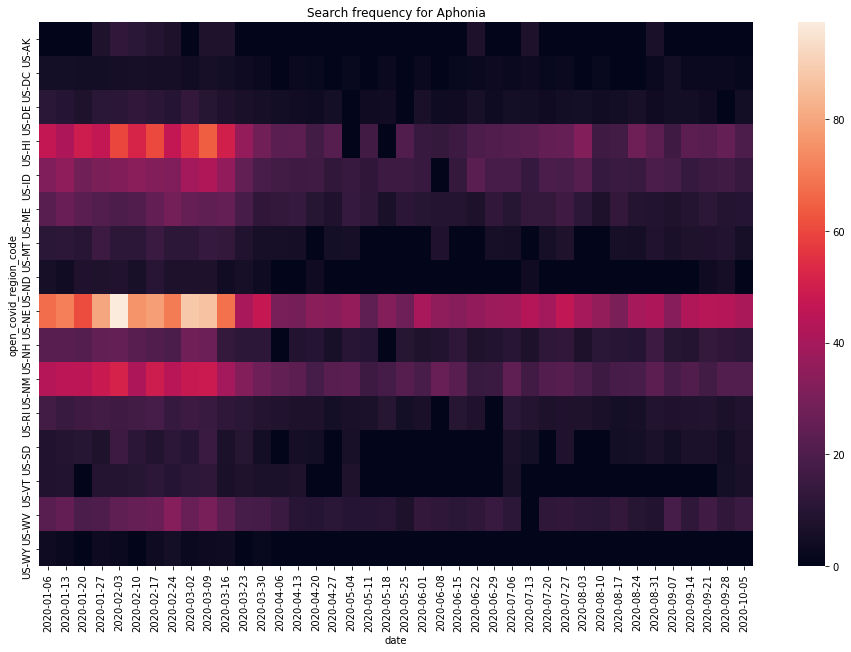

In [ ]:
#Aphonia
results_aphonia = aphonia.pivot_table(index = 'open_covid_region_code', columns = 'date', values = 'symptom:Aphonia')
plt.figure(figsize = (16,10))
plt.title("Search frequency for Aphonia")
sns.heatmap(results_aphonia,annot=False)

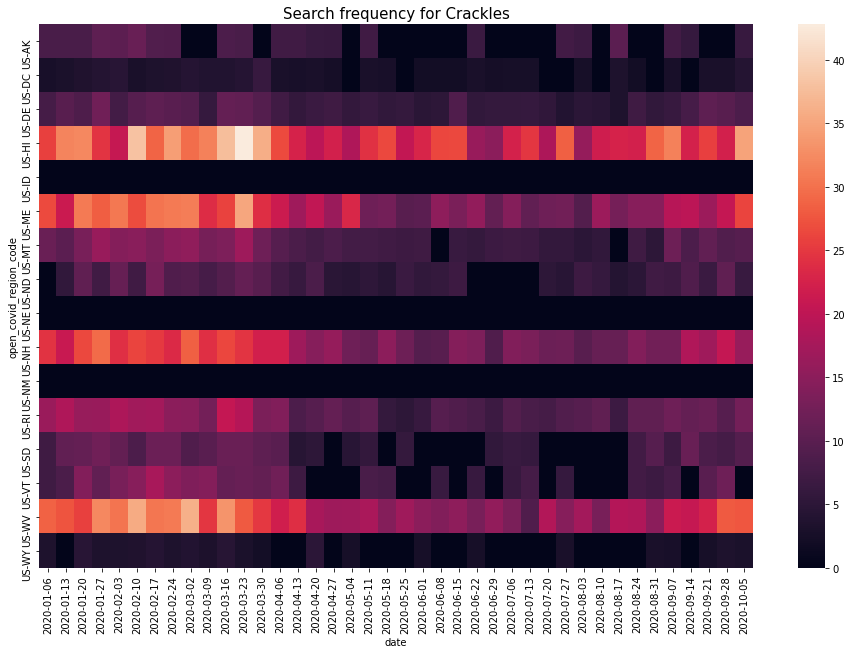

In [ ]:
#crackles
results_crackles = crackles.pivot_table(index = 'open_covid_region_code', columns = 'date', values = 'symptom:Crackles')
plt.figure(figsize = (16,10))
plt.title("Search frequency for Crackles", fontsize = 15)
sns.heatmap(results_crackles,annot=False)

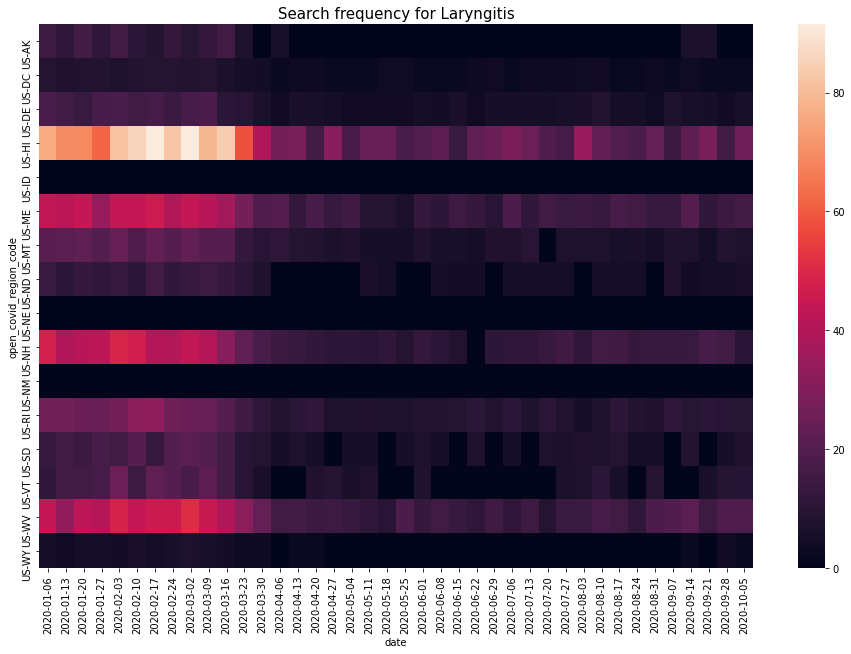

In [ ]:
#laryngitis
results_laryngitis = laryngitis.pivot_table(index = 'open_covid_region_code', columns = 'date', values = 'symptom:Laryngitis')
plt.figure(figsize = (16,10))
plt.title("Search frequency for Laryngitis", fontsize = 15)
sns.heatmap(results_laryngitis,annot=False)

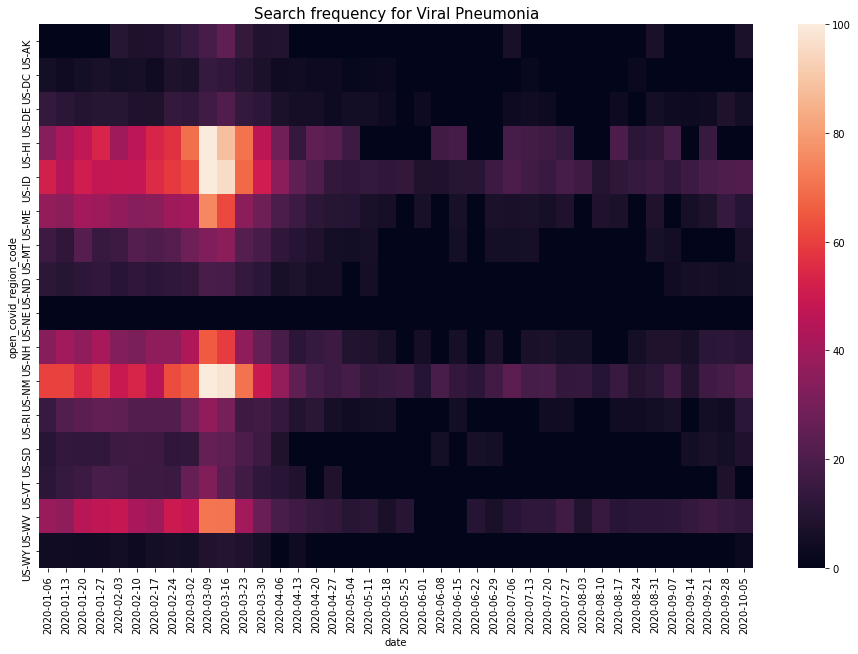

In [ ]:
#viral_pneumonia
results_viral_pneumonia = viral_pneumonia.pivot_table(index = 'open_covid_region_code', columns = 'date', values = 'symptom:Viral pneumonia')
plt.figure(figsize = (16,10))
plt.title("Search frequency for Viral Pneumonia",fontsize = 15)
sns.heatmap(results_viral_pneumonia,annot=False)

### subtask 2: Visualize the dataset in lower dimensional spaces by applying PCA.

In [ ]:
#first I treated the data and removed the columns with types other than float
# treating each time point as an independent data point
dataset1_reduce  = dataset1_symptoms.drop(['open_covid_region_code',
                                 'country_region_code','country_region',
                                 'sub_region_1','sub_region_1_code','date'],axis = 1)


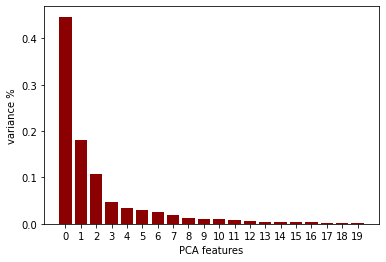

In [ ]:
#checking which lower dimension has lower variance
#by plotting PCA features number and percetage of variance

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(dataset1_reduce);
# Plot the variances
features = range(pca.n_components_);
plt.bar(features, pca.explained_variance_ratio_, color='darkred')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features);


In [ ]:
#Plotting 2d
pca2 = PCA(n_components = 2)
principal_components2d = pca2.fit_transform(dataset1_reduce)
principal2d = pd.DataFrame(data = principal_components2d
             , columns = ['principal component 1', 'principal component 2'])

Text(0.5, 1.0, '2D Representation of Dataset 1')

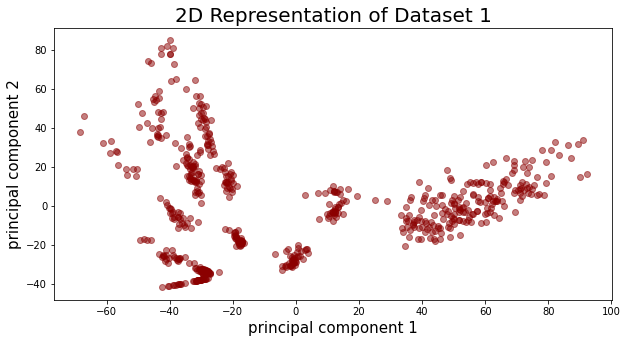

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(principal2d['principal component 1'],principal2d['principal component 2'],alpha = 0.5, color='darkred' )
plt.xlabel('principal component 1', fontsize = 15)
plt.ylabel('principal component 2', fontsize = 15)
plt.title('2D Representation of Dataset 1', fontsize = 20)

In [ ]:
#Plotting 3d data, which is the one we will be using later
pca3 = PCA(n_components = 3)
principal_components3d = pca3.fit_transform(dataset1_reduce)
principal3d = pd.DataFrame(data = principal_components3d
             , columns = ['principal component 1', 'principal component 2','principal component 3'])



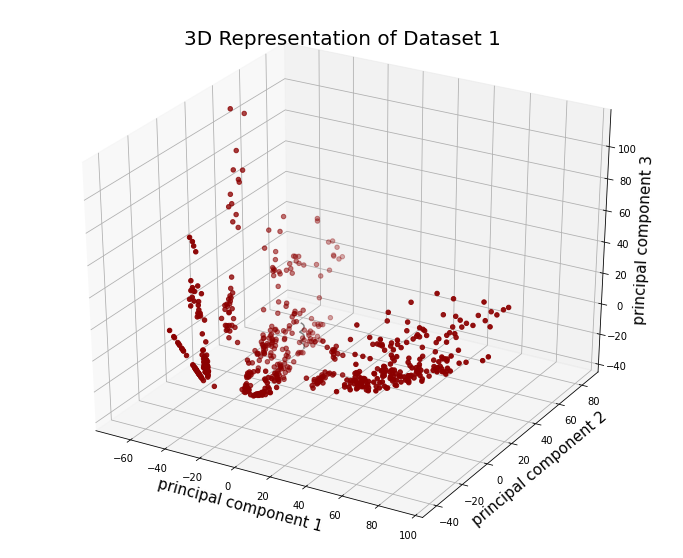

In [ ]:
fig_3d = plt.figure(figsize = (12,10))
ax = plt.axes(projection="3d")

z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = principal3d['principal component 3']
x_points = principal3d['principal component 1']
y_points = principal3d['principal component 2']
ax.scatter3D(x_points, y_points, z_points, color = 'darkred');

ax.set_xlabel('principal component 1', fontsize = 15)
ax.set_ylabel('principal component 2', fontsize = 15)
ax.set_zlabel('principal component 3', fontsize = 15)
plt.title('3D Representation of Dataset 1', fontsize = 20)
plt.show()


### subtask 3: Using K-Means to cluster both raw and PCA_reduced data. Compare the similarity.

First, I use the elbow method to find the best cluster number. Also, by using this technique, I may deduce the similarity between the raw data clusters and the PCA_reduced data clusters.

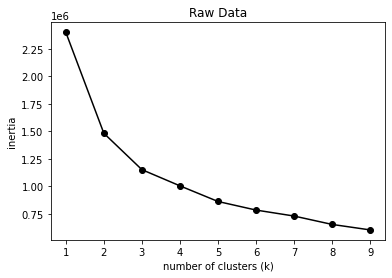

In [ ]:
#elbow method for raw data
ks = range(1,10)
inertias_raw = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model_raw = KMeans(n_clusters=k)
    
    # Fit model to samples
    model_raw.fit(dataset1_reduce)
    
    # Append the inertia to the list of inertias
    inertias_raw.append(model_raw.inertia_)
    

plt.plot(ks, inertias_raw, '-o', color='black')
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')
plt.xticks(ks)
plt.title('Raw Data')
plt.show()

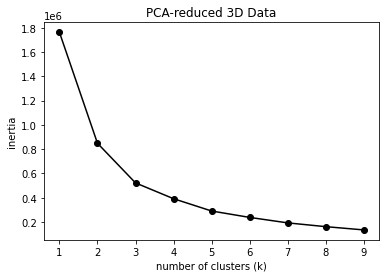

In [ ]:
#elbow method for 3d data
inertias_3d = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model_3d = KMeans(n_clusters=k)
    
    # Fit model to samples
    model_3d.fit(principal_components3d)
    
    # Append the inertia to the list of inertias
    inertias_3d.append(model_3d.inertia_)
    
plt.plot(ks, inertias_3d, '-o', color='black')
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')
plt.xticks(ks)
plt.title('PCA-reduced 3D Data')
plt.show()

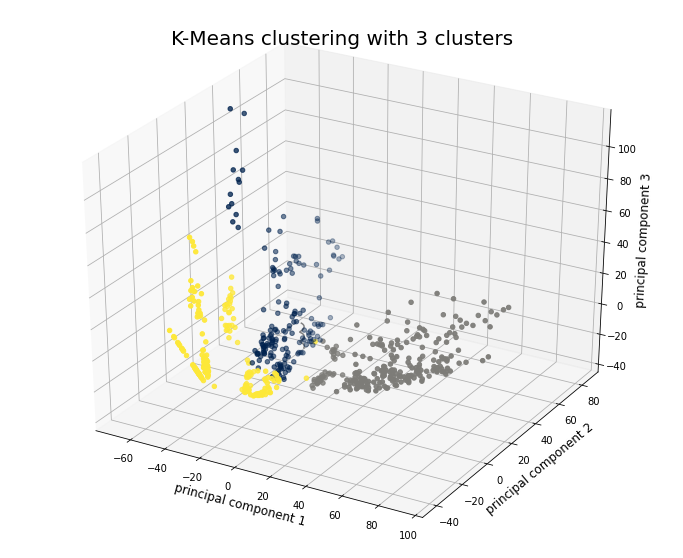

In [ ]:
#seems like the elbow point is 3! So I use 3 as my cluster number and apply kmeans to 3d data
#and then plot it
model = KMeans(n_clusters = 3)
model.fit(principal_components3d)
labels = model.fit_predict(principal_components3d)

fig_kmeans =  plt.figure(figsize = (12,10))
ax = plt.axes(projection="3d")

z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = principal3d['principal component 3']
x_points = principal3d['principal component 1']
y_points = principal3d['principal component 2']
ax.scatter(x_points, y_points, z_points, c = labels, cmap ='cividis');

ax.set_xlabel('principal component 1', fontsize = 12)
ax.set_ylabel('principal component 2', fontsize = 12)
ax.set_zlabel('principal component 3', fontsize = 12)
plt.title('K-Means clustering with 3 clusters', fontsize = 20)
plt.show()


This is the end of task 2.

## Task 3: Supervised Learning
(James Berry 260629889)

Initialization for task 3:

In [ ]:
# Import statements
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

### Subtask 1: Splitting the data into train and test sets

First, we extract just the datapoints from the merged dataframe for which we have feature values for our models - i.e. just the datapoints from US regions - this will be the data we work with for both the temporal and regional splits.

In [ ]:
# extracting the datapoints for the regions for which we have feature data
df = merged_data[merged_data['open_covid_region_code'].str.match('^US-') == True]
# filling in missing data 
df = df.interpolate(method='linear')
df = df.fillna(0)

Next we split the US data based on time - taking datapoints collected after 2020-08-10 for the validation set, and the remainder for training. We then extract the features - symptom search data, and the labels - hospitalization rates from the two split dataframes

In [ ]:
# splitting df into train and validation sets based on time (validation set made up of data collected after 2020-08-10)
time_tr, time_val = [x for _, x in df.groupby(df['date_x'] > '2020-08-10')]

# extracting the features and the labels from the time-based split data (refilling in symptom NaNs)
x_tr_time = time_tr.loc[:,'symptom:Adrenal crisis':'symptom:Viral pneumonia']
x_val_time = time_val.loc[:,'symptom:Adrenal crisis':'symptom:Viral pneumonia']
y_tr_time = time_tr['hospitalized_new']
y_val_time = time_val['hospitalized_new']

For the regional-based split we implement a cross-validation function utilizing sklearns GroupKFold to split the data into folds while preserving regions together

In [ ]:
def cross_validate(folds):

  regions = df['open_covid_region_code']
  X = df.loc[:,'symptom:Adrenal crisis':'symptom:Viral pneumonia'].to_numpy()
  y = df['hospitalized_new'].to_numpy()
  gkf = GroupKFold(n_splits=folds)

  for tr_ind, val_ind in gkf.split(X, y, regions):
    yield X[tr_ind], X[val_ind], y[tr_ind], y[val_ind]


### Subtask 2: Implementation of KNN and Decision Tree regression models

First we implement a function to obtain the best hyperparameter value for a given model, along with the mean squared error and R2 score associated with it, used for all of the models below:

In [ ]:
def find_best_model(split_type, mse_lst, r2_lst, std):

  # Find lowest mse, and the index (parameter value) associated with it
  mse = np.amin(mse_lst)
  if mse_lst.ndim == 1:
    best_param = np.argmin(mse_lst) 
  else:
    best_param = np.unravel_index(np.argmin(mse_lst), mse_lst.shape)

  # If cross-validation used, find the lowest parameter value within 1 standard deviation of the lowest mse
  """if split_type == 'Region':
    err = std[best_param]
    for i, val in np.ndenumerate(mse_lst):
        if (mse - err) <= val >= (mse + err):
          best_param = i
          mse = val
          break"""
  if mse_lst.ndim == 1:
    r2 = r2_lst[best_param]
  else:
    r2 = r2_lst[best_param[0]][best_param[1]]

  return best_param, mse, r2

#### K-Nearest Neighbour Regression

Next we implement a function that trains K-Nearest Neighbour models within a given hyperparameter range, obtains and plots the associated error for each, and returns the best hyperparameter value.

In [ ]:
def knn(min_k, max_k, split_type):

  # Variable declarations
  n = len(df.index)
  std = None
  K_list = range(min_k, max_k)
  err, r2 = np.zeros(len(K_list)), np.zeros(len(K_list))

  # Building KNN models with k from min_k to max_k and calculating the error
  for i,k in enumerate(K_list):
    if split_type == 'Time':
      model = KNeighborsRegressor(n_neighbors=k)
      model.fit(x_tr_time, y_tr_time)
      err[i] = mean_squared_error(y_val_time, model.predict(x_val_time))
      r2[i] = r2_score(y_val_time, model.predict(x_val_time))
    # if working with regionally split data use 5-fold cross-validation
    else:
      err = np.zeros((len(K_list), 5))
      r2 = np.zeros((len(K_list), 5))
      for f, (x_tr, x_val, y_tr, y_val) in enumerate(cross_validate(n,5)):
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(x_tr, y_tr)
        err[i,f] = mean_squared_error(y_val, model.predict(x_val))
        r2[i,f] = r2_score(y_val, model.predict(x_val))

  # Plot MSE vs # of neighbours K
  if split_type == 'Time':
    plt.plot(K_list, err)
  else:
    std = np.std(err, axis = 1)
    mean_err = np.mean(err, axis = 1)
    mean_r2 = np.mean(r2, axis = 1)
    plt.plot(K_list, err)
    #plt.errorbar(K_list, mean_err, yerr=std)
  plt.xlabel('Number of Neighbours K')
  plt.ylabel('Mean Squared Error')
  plt.title('Error of K-NN with K Neighbours, ' + split_type + '-based data split')
  plt.show

  # Return best model
  if split_type == 'Time':
    param_ind, best_mse, best_r2 = find_best_model(split_type, err, r2, std)
    return K_list[param_ind], best_mse, best_r2
  else:
    param_ind, best_mse, best_r2 = find_best_model(split_type, mean_err, mean_r2, std)
    return K_list[param_ind], best_mse, best_r2

Now we examine K-NN's performance on both the regionally split and temporally split data.

In [ ]:
# knn for region based split
knn_region, knn_region_mse, knn_region_r2 = knn(1, 5, 'Region')
print("Best performing model with the time data split has a k value of " + str(knn_region))
print("with a mean squared error of " + str(knn_region_mse))
print("and an R2 score of " + str(knn_region_r2))

TypeError: ignored

In [ ]:
# knn for time based split
knn_time, knn_time_mse, knn_time_r2 = knn(1, 50, 'Time')
print("Best performing model with the time data split has a k value of " + str(knn_time))
print("with a mean squared error of " + str(knn_time_mse))
print("and an R2 score of " + str(knn_time_r2))

#### Decision Tree Regression

Similarly to above, we implement a function to train decision tree models within a given hyperparameter range, and obtain the error, before examining it's performance on regionally and temporally split data.

In [ ]:
def decision_tree(min_depth, max_depth, split_type):

  # Variable declarations
  n = len(df.index)
  depth_list = range(min_depth, max_depth)
  err, r2 = np.zeros(len(depth_list)), np.zeros(len(depth_list))
  std = None

  # Building decision trees with maximum depth from min_depth to max_depth and calculating the error
  for i,d in enumerate(depth_list):
    if split_type == 'Time':
      model = DecisionTreeRegressor(max_depth=d)
      model.fit(x_tr_time, y_tr_time)
      err[i] = mean_squared_error(y_val_time, model.predict(x_val_time))
      r2[i] = r2_score(y_val_time, model.predict(x_val_time))
    else:
      err = np.zeros((len(depth_list), 5))
      r2 = np.zeros((len(depth_list), 5))
      for f, cross_val in enumerate(cross_validate(n, 5)):
        model = DecisionTreeRegressor(max_depth=d)
        model.fit(cross_val[0], cross_val[2])
        err[i,f] = mean_squared_error(cross_val[3], model.predict(cross_val[1]))
        r2[i,f] = r2_score(cross_val[3], model.predict(cross_val[1]))


  # Plot MSE vs maximum depth
  if split_type == 'Time':
    plt.plot(depth_list, err)
  else:
    std = np.std(err, axis = 1)
    err = np.mean(err, axis = 1)
    r2 = np.mean(r2, axis = 1)
    plt.errorbar(depth_list, err, std)
  plt.xlabel('Max Depth of Tree')
  plt.ylabel('Mean Squared Error')
  plt.title('Error of Decision Trees Based on Max Depth, ' + split_type + '-based Data Split')
  plt.show

  # Return best model
  param_ind, best_mse, best_r2 = find_best_model(split_type, err, r2, std)
  return depth_list[param_ind], best_mse, best_r2

In [ ]:
# decision tree for region based split
dt_region, dt_region_mse, dt_region_r2 = decision_tree(1, 5, 'Region')
print('Best performing model with the regional data split has a tree depth of ' + str(dt_region))
print('with a mean squared error of ' + str(dt_region_mse))
print('and an R2 score of ' + str(dt_region_r2))

In [ ]:
# decision tree for time based split
dt_time, dt_time_mse, dt_time_r2 = decision_tree(1, 20, 'Time')
print('Best performing model with the temporal data split has a tree depth of ' + str(dt_time))
print('with a mean squared error of ' + str(dt_time_mse))
print('and an R2 score of ' + str(dt_time_r2))

### Subtask 3: Further strategies

Finally, we explore the performance of similar models to both KNN and decision trees on our data - utilizing Radius Neighbours and Random Forests respectively (See report for details), implemented below in a similar format to the implementations above.

#### Radius Neighbours


In [ ]:
def radius_neighbours(min_radius, max_radius, split_type):

  # Variable declarations
  n = len(df.index)
  std = None
  radii = np.arange(min_radius, max_radius, 0.5)
  radius_list = radii.tolist()
  err, r2 = np.zeros(len(radius_list)), np.zeros(len(radius_list))

  # Building radius neighbours models with radius from min_radius to max_radius and calculating the error
  for i,r in enumerate(radius_list):
    if split_type == 'Time':
      model = RadiusNeighborsRegressor(radius=r)
      model.fit(x_tr_time, y_tr_time)
      err[i] = mean_squared_error(y_val_time, model.predict(x_val_time))
      r2[i] = r2_score(y_val_time, model.predict(x_val_time))
    else:
      err = np.zeros((len(radius_list), 5))
      r2 = np.zeros((len(radius_list), 5))
      for f, (x_tr, x_val, y_tr, y_val) in enumerate(cross_validate(n,5)):
        model = RadiusNeighborsRegressor(radius=r)
        model.fit(x_tr, y_tr)
        err[i,f] = mean_squared_error(y_val, model.predict(x_val))
        r2[i,f] = r2_score(y_val, model.predict(x_val))

  # Plot MSE vs radius r
  if split_type == 'Time':
    plt.plot(radius_list, err)
  else:
    std = np.std(err, axis = 1)
    err = np.mean(err, axis = 1)
    r2 = np.mean(r2, axis = 1)
    plt.errorbar(radius_list, err, std)
  plt.xlabel('Radius r')
  plt.ylabel('Mean Squared Error')
  plt.title('Error of Radius Neighbours with Radius r, ' + split_type + '-based data split')
  plt.show

  # Return best model
  param_ind, best_mse, best_r2 = find_best_model(split_type, err, r2, std)
  return radius_list[param_ind], best_mse, best_r2

In [ ]:
# radius neighbours for region based split
rn_region, rn_region_mse, rn_region_r2 = radius_neighbours(0.5, 4, 'Region')
print('Best performing model with the regional data split has a radius of ' + str(rn_region))
print('with a mean squared error of ' + str(rn_region_mse))
print('and an R2 score of ' + str(rn_region_r2))

In [ ]:
# radius neighbours for time based split
rn_time, rn_time_mse, rn_time_r2 = radius_neighbours(0.5, 4, 'Time')
print('Best performing model with the temporal data split has a radius of ' + str(rn_time))
print('with a mean squared error of ' + str(rn_time_mse))
print('and an R2 score of ' + str(rn_time_r2))

#### Random Forests

In [ ]:
def random_forest(min_trees, max_trees, min_depth, max_depth, split_type):

  # Variable declarations
  n = len(df.index)
  std = None
  n_estimators_list = range(min_trees, max_trees)
  depth_list = range(min_depth, max_depth)
  err = np.zeros((len(n_estimators_list), len(depth_list)))
  r2 = np.zeros((len(n_estimators_list), len(depth_list)))

  # Building random forests varying number of trees and maximum depth and calculating the error
  for i,t in enumerate(n_estimators_list):
    for j,d in enumerate(depth_list):
      if split_type == 'Time':
        model = RandomForestRegressor(n_estimators=t, max_depth=d)
        model.fit(x_tr_time, y_tr_time)
        err[i,j] = mean_squared_error(y_val_time, model.predict(x_val_time))
        r2[i,j] = r2_score(y_val_time, model.predict(x_val_time))
      else:
        err = np.zeros((len(n_estimators_list), len(depth_list), 5))
        r2 =  np.zeros((len(n_estimators_list), len(depth_list), 5))
        for f, (x_tr, x_val, y_tr, y_val) in enumerate(cross_validate(n,5)):
          model = RandomForestRegressor(n_estimators=t)
          model.fit(x_tr, y_tr)
          err[i,j,f] = mean_squared_error(y_val, model.predict(x_val))
          r2[i,j,f] = r2_score(y_val, model.predict(x_val))

  # Plot MSE vs hyperparams
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  X, Y = np.meshgrid(n_estimators_list, depth_list)
  if split_type == 'Time':
    surf = ax.plot_surface(X, Y, np.transpose(err))
  else:
    std = np.std(err, axis = 2)
    err = np.mean(err, axis = 2)
    r2 = np.mean(r2, axis = 2)
    surf(ax.plot_surface(X, Y, np.transpose(err)))
    for row in std:
      ax.plot((row[0], row[0]), (row[1], row[1]), (row[2], err[(row[0], row[1])]), c='k', zorder=1)
      ax.plot((row[0], row[0]), (row[1], row[1]), (err[(row[0], row[1])], row[2]), c='k', zorder=3)

  ax.set_xlabel('Number of Trees', fontsize = 15)
  ax.set_ylabel('Maximum Tree Depth', fontsize = 15)
  ax.set_zlabel('Mean Squared Error', fontsize = 15)
  plt.title('Error of Random Forest vs Hyperparameters Number of Trees and Max Depth', fontsize = 20)
  plt.show()

  # Return best model
  return find_best_model(split_type, err, r2, std)

In [ ]:
# random forest for region based split
rf_region, rf_region_mse, rf_region_r2 = random_forest(1, 5, 1, 5 'Region')
rf_region_trees = rf_region[0]
rf_region_depth = rf_region[1]
print('Best performing model with the regional data split has ' + str(rf_region_trees) + ' trees')
print('and a maximum depth of ' + str(rf_region_depth))
print('with a mean squared error of ' + str(rf_region_mse))
print('and an R2 score of ' + str(rf_region_r2))

In [ ]:
# random forest for time based split
rf_time, rf_time_mse, rf_time_r2 = random_forest(1, 10, 1, 20, 'Time')
rf_time_trees = rf_time[0]
rf_time_depth = rf_time[1]
print('Best performing model with the temporal data split has ' + str(rf_time_trees) + ' trees')
print('and a maximum depth of ' + str(rf_time_depth))
print('with a mean squared error of ' + str(rf_time_mse))
print('and an R2 score of ' + str(rf_time_r2))